In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

# 0. Data

Source & Description: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [5]:
df = pd.read_csv("./data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


# 1. Encoding

## Month Encoding

In [8]:
from time import strptime

In [9]:
df["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [10]:
df["MonthNum"] = df["Month"].apply(lambda x: strptime(x[:3],'%b').tm_mon)

In [11]:
df["MonthNum"].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12])

## Visitor Type Encoding

In [12]:
df["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [13]:
df["VisitorTypeNum"] = df["VisitorType"].apply(lambda x: 0 if x == "New_Visitor" else 1 if x == "Returning_Visitor" else 2)

In [14]:
df["VisitorTypeNum"].unique()

array([1, 0, 2])

## Weekend Encoding

In [15]:
df["Weekend"].unique()

array([False,  True])

In [16]:
df["Weekend"] = df["Weekend"].astype(int)

In [17]:
df["Weekend"].unique()

array([0, 1])

## Revenue Encoding

In [18]:
df["Revenue"].unique()

array([False,  True])

In [19]:
df["Revenue"] = df["Revenue"].astype(int)

In [20]:
df["Revenue"].unique()

array([0, 1])

## Results

In [21]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,MonthNum,VisitorTypeNum
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,7.651987,0.869505
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,3.392841,0.356740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,5.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,7.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,11.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,12.000000,2.000000


# 2. Target & Features

In [22]:
TARGET = "Revenue"
FEATURES = [
    'Administrative',
    'Administrative_Duration',
    'BounceRates',
    'Browser',
    'ExitRates',
    'Informational',
    'Informational_Duration',
    'MonthNum',
    'OperatingSystems',
    'PageValues',
    'ProductRelated',
    'ProductRelated_Duration',
    'Region',
    'SpecialDay',
    'TrafficType',
    'VisitorTypeNum',
    'Weekend'
]

In [23]:
X = df[FEATURES]
Y = df[TARGET]

In [24]:
X.shape, Y.shape

((12330, 17), (12330,))

# 3. Tree-Based Modeling

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn import metrics

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
train_x, test_x, train_y, test_y= train_test_split(X, Y, test_size=0.2, random_state=1234)

In [29]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((9864, 17), (2466, 17), (9864,), (2466,))

In [30]:
train_y.mean(), test_y.mean()

(0.15450121654501217, 0.15571776155717762)

In [31]:
def eval_func(actual, pred, pred_proba):
    # Accuracy & Precision & Recall
    accuracy = (actual == pred).mean()
    precision = metrics.precision_score(actual, pred)
    recall = metrics.recall_score(actual, pred)
    print("** Key Metrics:")
    print(f"Accuracy: {accuracy*100:.1f}%, Precision: {precision*100:.01f}%, Recall: {recall*100:.01f}%")
    # AUC/ROC
    print("\n\n** AUC/ROC:")
    dp = metrics.RocCurveDisplay.from_predictions(
        actual,
        pred_proba,
        name="Conversion",
        color="darkorange",
    )
    _ = dp.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="ROC Curve",
    )
    plt.grid()
    plt.show()
    # Confusion Matrix
    print("\n\n** Confusion Matrix:")
    cf_matrix = metrics.confusion_matrix(actual, pred)
    
    ax = plt.subplot()
    sns.heatmap(
        cf_matrix, 
        annot=True, 
        annot_kws={"size": 10},
        fmt="g", 
        ax=ax
    )

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix")
    plt.show()
    
    ax = plt.subplot()
    sns.heatmap(
        cf_matrix/cf_matrix.sum(axis=0), 
        annot=True, 
        annot_kws={"size": 10},
        fmt=".1%", 
        cmap='Blues',
        ax=ax
    )

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix - Prediction Precision")
    plt.show()
    
    ax = plt.subplot()
    sns.heatmap(
        cf_matrix/cf_matrix.sum(axis=1)[...,None], 
        annot=True, 
        annot_kws={"size": 10},
        fmt=".1%", 
        cmap='Blues',
        ax=ax
    )

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix - Prediction Recall")
    plt.show()

## 3.1. RandomForest

### 3.1.1. Train

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier(
    n_estimators=250, max_depth=5, class_weight="balanced", n_jobs=-1
)

In [34]:
%%time

rf_model.fit(train_x, train_y)

CPU times: user 1.55 s, sys: 207 ms, total: 1.76 s
Wall time: 507 ms


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=250,
                       n_jobs=-1)

### 3.1.2. Eval

In [35]:
rf_pred = rf_model.predict(test_x)

In [36]:
rf_pred_proba = rf_model.predict_proba(test_x)[:,1]

In [37]:
rf_pred

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
rf_pred_proba

array([0.39092945, 0.01192208, 0.13211083, ..., 0.79418963, 0.32724734,
       0.31189706])

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, rf_pred_proba, pos_label=2)

/Users/yoonhyuph/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


** Key Metrics:
Accuracy: 86.5%, Precision: 54.3%, Recall: 84.1%


** AUC/ROC:


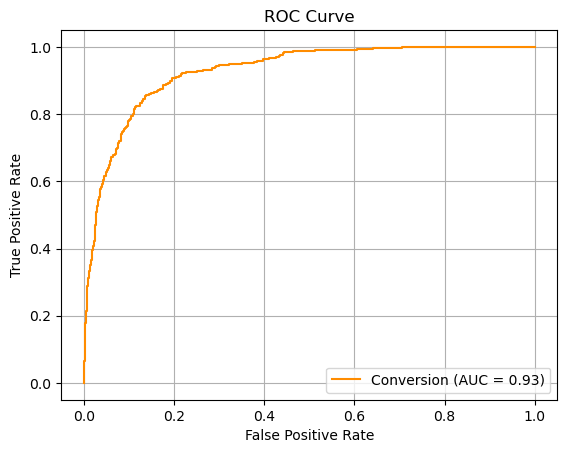



** Confusion Matrix:


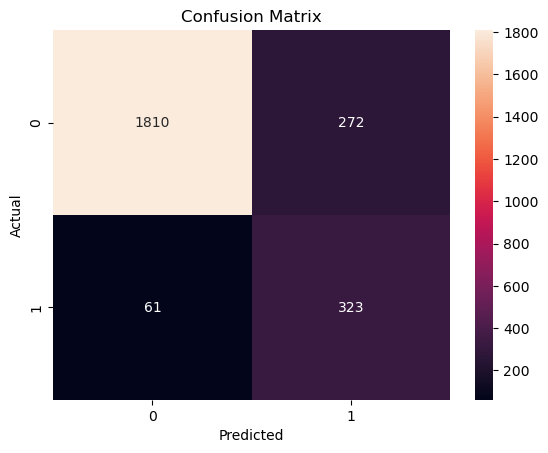

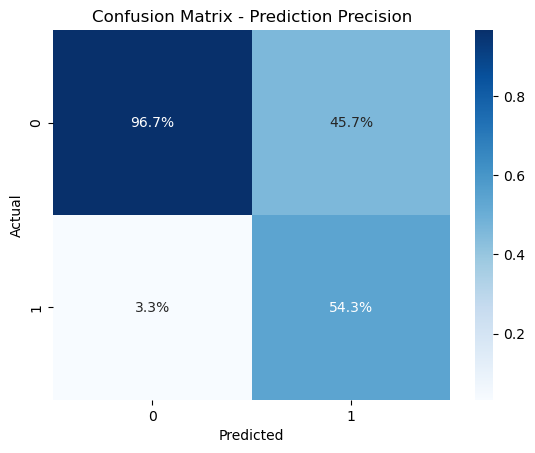

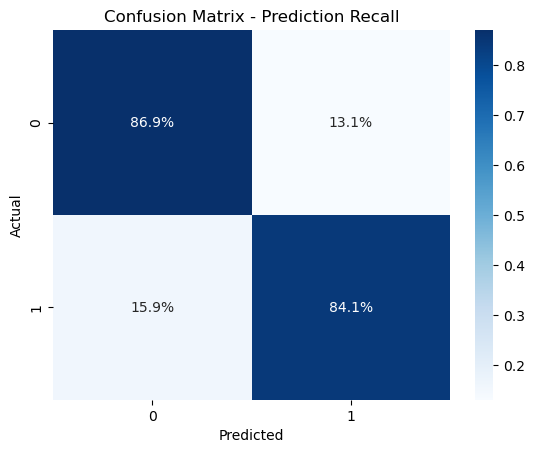

In [40]:
eval_func(test_y, rf_pred, rf_pred_proba)

## 3.2. XGBoost

### 3.2.1. Train

In [41]:
from xgboost import XGBClassifier

In [42]:
train_y.mean(), 1/train_y.mean()

(0.15450121654501217, 6.47244094488189)

In [43]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    scale_pos_weight=1/train_y.mean(),
)

In [44]:
%%time

xgb_model.fit(train_x, train_y)

CPU times: user 5.2 s, sys: 328 ms, total: 5.52 s
Wall time: 390 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 3.2.2. Eval

In [45]:
xgb_pred = xgb_model.predict(test_x)

In [46]:
xgb_pred_proba = xgb_model.predict_proba(test_x)[:,1]

** Key Metrics:
Accuracy: 86.6%, Precision: 54.9%, Recall: 79.2%


** AUC/ROC:


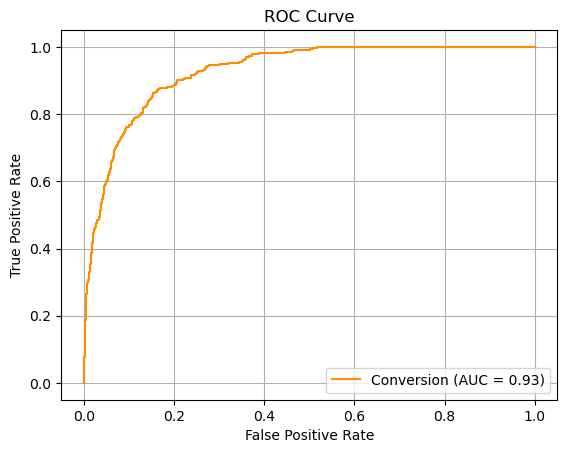



** Confusion Matrix:


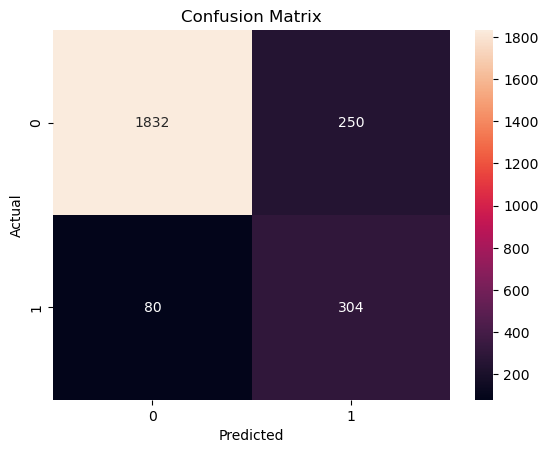

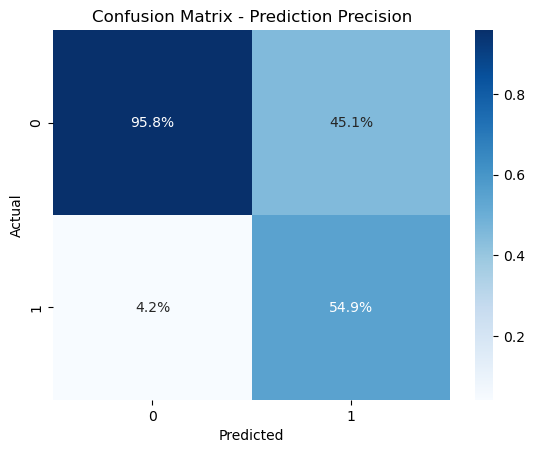

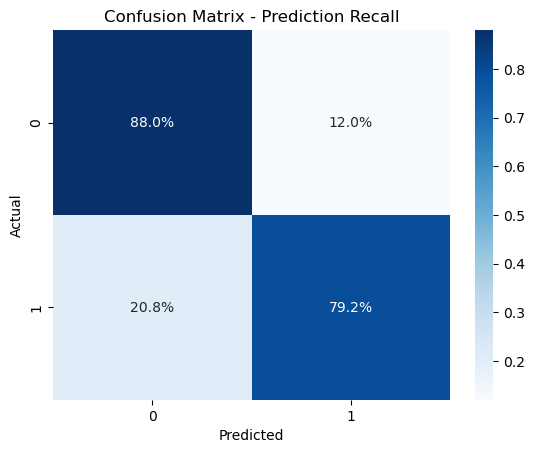

In [47]:
eval_func(test_y, xgb_pred, xgb_pred_proba)

# 4. Deep Learning Based Modeling

In [48]:
import os
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

In [49]:
import keras

2024-07-13 18:15:33.620933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 4.0. Normalize

In [50]:
mean = train_x.mean()
std = train_x.std()

In [51]:
normed_train_x = (train_x - mean)/std
normed_test_x = (test_x - mean)/std

In [52]:
print("** Mean: ")
display(pd.DataFrame(mean))

print("** STD: ")
display(pd.DataFrame(std))

** Mean: 


,0
Administrative,2.304745
Administrative_Duration,80.442878
BounceRates,0.022473
Browser,2.339619
ExitRates,0.043376
Informational,0.500710
Informational_Duration,35.041119
MonthNum,7.636050
OperatingSystems,2.121857
PageValues,5.842192


** STD: 


,0
Administrative,3.312479
Administrative_Duration,175.872996
BounceRates,0.048757
Browser,1.701199
ExitRates,0.048707
Informational,1.264558
Informational_Duration,142.434615
MonthNum,3.388666
OperatingSystems,0.916106
PageValues,18.774015


In [53]:
print("** Normed Mean: ")
display(pd.DataFrame(normed_train_x.mean()))

print("** Normed STD: ")
display(pd.DataFrame(normed_train_x.std()))

** Normed Mean: 


,0
Administrative,-3.889832e-17
Administrative_Duration,-8.644072e-18
BounceRates,-5.546613e-17
Browser,2.953391e-17
ExitRates,-1.030085e-16
Informational,-6.194918e-17
Informational_Duration,2.269069e-17
MonthNum,-8.860174e-17
OperatingSystems,-8.500004e-17
PageValues,-1.584747e-17


** Normed STD: 


,0
Administrative,1.0
Administrative_Duration,1.0
BounceRates,1.0
Browser,1.0
ExitRates,1.0
Informational,1.0
Informational_Duration,1.0
MonthNum,1.0
OperatingSystems,1.0
PageValues,1.0


## 4.1. Wide Net

In [54]:
model = keras.Sequential(
    [
        keras.Input(shape=normed_train_x.shape[1:]),
        keras.layers.Dense(2048, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              36864     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


### 4.1.1. Train

In [55]:
model_metrics = [
    keras.metrics.Accuracy(name="accuracy"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=model_metrics
)

best_model_path = "./checkpoint.wide-model.keras"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=best_model_path,
    monitor="val_precision",
    mode="max",
    save_best_only=True
)

class_weight = {0: 1, 1: 1/train_y.mean()}

history = model.fit(
    normed_train_x.to_numpy(),
    train_y.to_numpy(),
    batch_size=64,
    epochs=30,
    verbose=2,
    callbacks=[
        model_checkpoint_callback,
    ],
    validation_data=(normed_test_x.to_numpy(), test_y.to_numpy()),
    class_weight=class_weight,
)

Epoch 1/30
155/155 - 1s - loss: 0.8298 - accuracy: 9.1241e-04 - precision: 0.4052 - recall: 0.8091 - val_loss: 0.4735 - val_accuracy: 8.1103e-04 - val_precision: 0.4235 - val_recall: 0.8438 - 1s/epoch - 7ms/step
Epoch 2/30
155/155 - 0s - loss: 0.7282 - accuracy: 3.0414e-04 - precision: 0.4585 - recall: 0.8294 - val_loss: 0.4113 - val_accuracy: 0.0000e+00 - val_precision: 0.4868 - val_recall: 0.8177 - 338ms/epoch - 2ms/step
Epoch 3/30
155/155 - 0s - loss: 0.6947 - accuracy: 0.0000e+00 - precision: 0.4652 - recall: 0.8301 - val_loss: 0.4247 - val_accuracy: 0.0000e+00 - val_precision: 0.4744 - val_recall: 0.8438 - 305ms/epoch - 2ms/step
Epoch 4/30
155/155 - 0s - loss: 0.6772 - accuracy: 0.0000e+00 - precision: 0.4796 - recall: 0.8425 - val_loss: 0.4238 - val_accuracy: 0.0000e+00 - val_precision: 0.4670 - val_recall: 0.8464 - 308ms/epoch - 2ms/step
Epoch 5/30
155/155 - 0s - loss: 0.6584 - accuracy: 0.0000e+00 - precision: 0.4758 - recall: 0.8497 - val_loss: 0.4192 - val_accuracy: 0.0000e+0

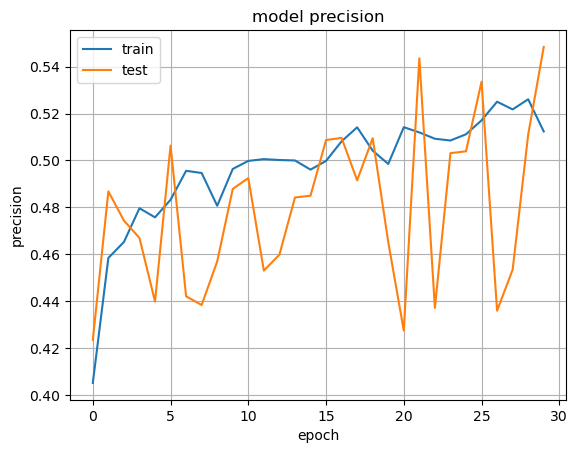

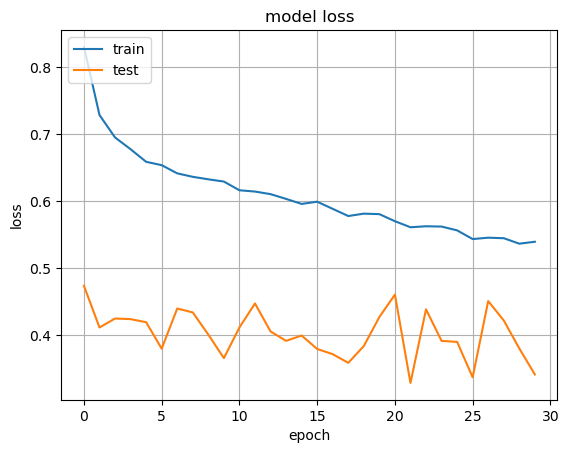

In [56]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

### 4.1.2. Eval

In [57]:
wide_best_model = keras.models.load_model(best_model_path)

In [58]:
wide_best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              36864     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [59]:
unflattened = wide_best_model.predict(normed_test_x)

78/78 [==============================] - 0s 739us/step


In [60]:
unflattened

array([[3.8989505e-01],
       [4.3466437e-07],
       [2.2480215e-03],
       ...,
       [8.4683198e-01],
       [1.9803239e-01],
       [8.0273889e-02]], dtype=float32)

In [61]:
wide_pred_proba = wide_best_model.predict(normed_test_x).flatten()

78/78 [==============================] - 0s 788us/step


In [62]:
wide_pred_proba

array([3.8989505e-01, 4.3466437e-07, 2.2480215e-03, ..., 8.4683198e-01,
       1.9803239e-01, 8.0273889e-02], dtype=float32)

In [63]:
wide_preds = [1 if x > 0.5 else 0 for x in wide_pred_proba]

** Key Metrics:
Accuracy: 86.6%, Precision: 54.8%, Recall: 79.7%


** AUC/ROC:


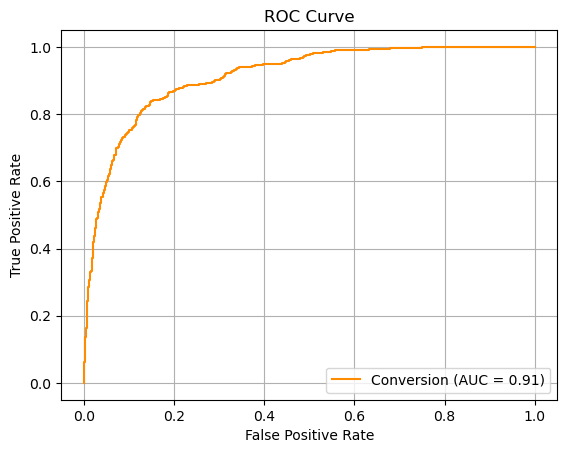



** Confusion Matrix:


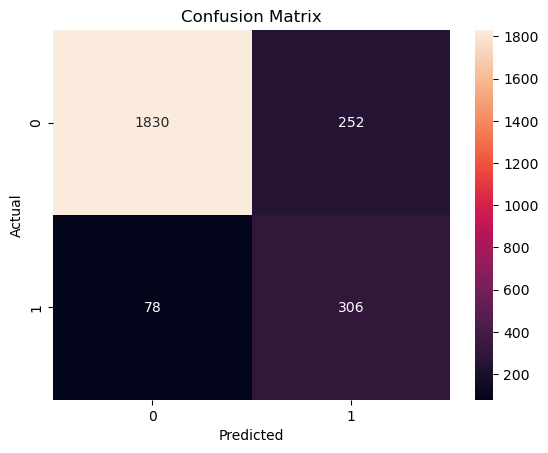

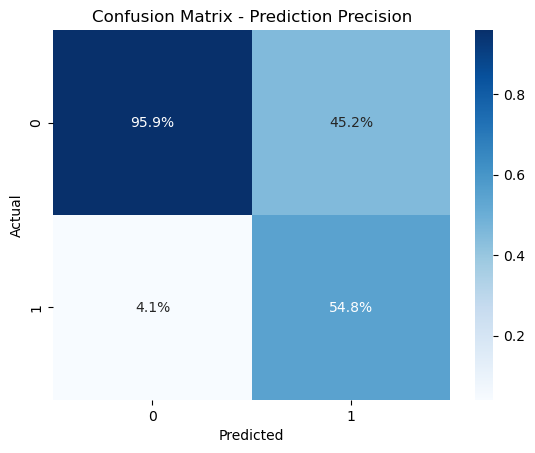

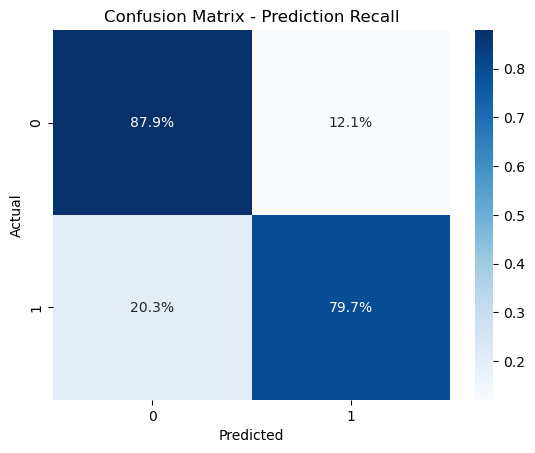

In [64]:
eval_func(test_y, wide_preds, wide_pred_proba)

## 4.2. Deep Net

In [65]:
model = keras.Sequential(
    [
        keras.Input(shape=normed_train_x.shape[1:]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2304      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35,457
Trainable params: 35,457
Non-trai

### 4.2.1. Train

In [66]:
model_metrics = [
    keras.metrics.Accuracy(name="accuracy"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=model_metrics
)

best_model_path = "./checkpoint.deep-model.keras"

early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001,
    patience=3
)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=best_model_path,
    monitor="val_precision",
    mode="max",
    save_best_only=True
)

class_weight = {0: 1, 1: 1/train_y.mean()}

history = model.fit(
    normed_train_x.to_numpy(),
    train_y.to_numpy(),
    batch_size=64,
    epochs=30,
    verbose=2,
    callbacks=[
        # early_stopping_callback, 
        model_checkpoint_callback,
    ],
    validation_data=(normed_test_x.to_numpy(), test_y.to_numpy()),
    class_weight=class_weight,
)

Epoch 1/30
155/155 - 1s - loss: 0.8665 - accuracy: 5.0689e-04 - precision: 0.3733 - recall: 0.7881 - val_loss: 0.4267 - val_accuracy: 4.0551e-04 - val_precision: 0.4536 - val_recall: 0.8281 - 906ms/epoch - 6ms/step
Epoch 2/30
155/155 - 0s - loss: 0.7378 - accuracy: 3.0414e-04 - precision: 0.4391 - recall: 0.8425 - val_loss: 0.3776 - val_accuracy: 0.0000e+00 - val_precision: 0.5000 - val_recall: 0.8229 - 318ms/epoch - 2ms/step
Epoch 3/30
155/155 - 0s - loss: 0.7027 - accuracy: 2.0276e-04 - precision: 0.4464 - recall: 0.8386 - val_loss: 0.3896 - val_accuracy: 0.0000e+00 - val_precision: 0.4848 - val_recall: 0.8281 - 248ms/epoch - 2ms/step
Epoch 4/30
155/155 - 0s - loss: 0.6715 - accuracy: 0.0000e+00 - precision: 0.4669 - recall: 0.8478 - val_loss: 0.4072 - val_accuracy: 0.0000e+00 - val_precision: 0.4846 - val_recall: 0.8594 - 246ms/epoch - 2ms/step
Epoch 5/30
155/155 - 0s - loss: 0.6461 - accuracy: 0.0000e+00 - precision: 0.4736 - recall: 0.8602 - val_loss: 0.4312 - val_accuracy: 0.0000

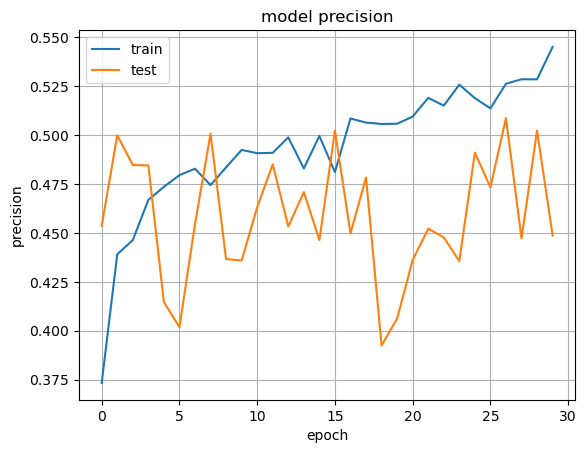

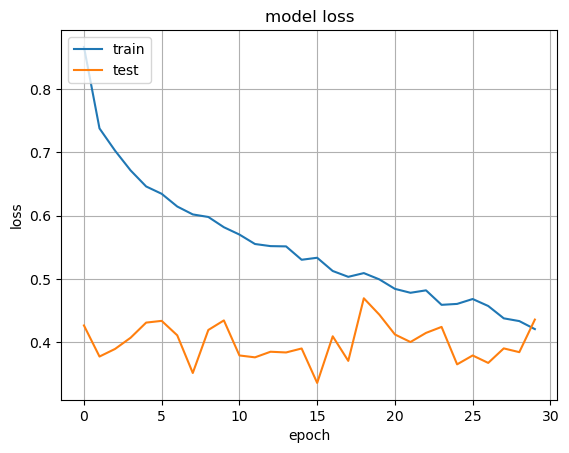

In [67]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

### 4.1.2. Eval

In [68]:
deep_best_model = keras.models.load_model(best_model_path)

In [69]:
deep_best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2304      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35,457
Trainable params: 35,457
Non-trai

In [70]:
deep_pred_proba = deep_best_model.predict(normed_test_x).flatten()

78/78 [==============================] - 0s 609us/step


In [71]:
deep_preds = [1 if x > 0.5 else 0 for x in deep_pred_proba]

** Key Metrics:
Accuracy: 84.9%, Precision: 50.9%, Recall: 83.1%


** AUC/ROC:


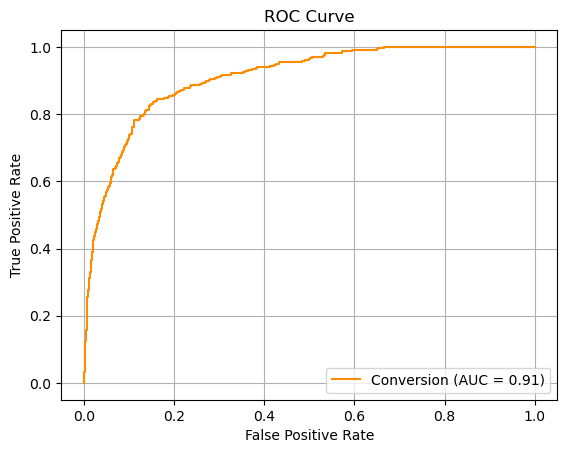



** Confusion Matrix:


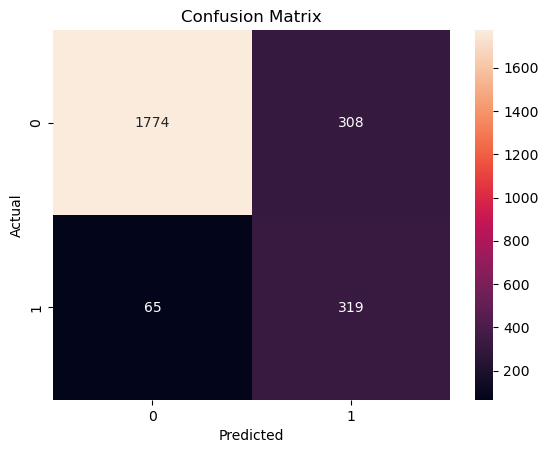

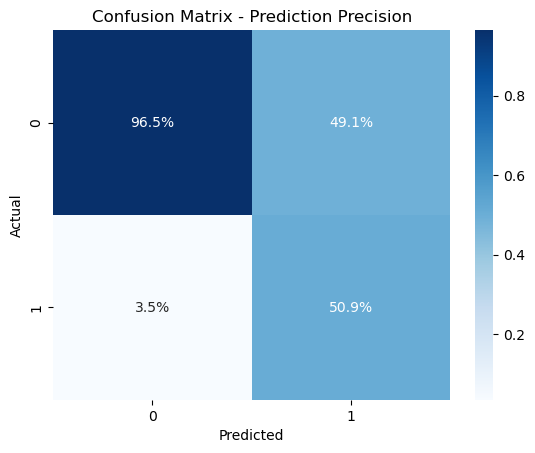

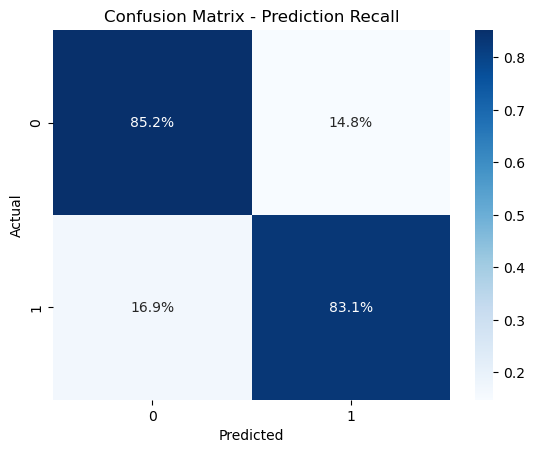

In [72]:
eval_func(test_y, deep_preds, deep_pred_proba)

# 5. A/B Testing

In [73]:
test_y.shape

(2466,)

## 5.1. Random Selection of Test Groups

In [74]:
group_a_indexes = sorted(list(np.random.choice(2000, 1000, replace=False)))
group_b_indexes = [x for x in range(2000) if x not in group_a_indexes]

In [75]:
len(group_a_indexes)

1000

In [76]:
np.min(group_a_indexes), np.max(group_a_indexes)

(0, 1998)

In [77]:
len(group_b_indexes)

1000

In [78]:
np.min(group_b_indexes), np.max(group_b_indexes)

(1, 1999)

## 5.2. XGBoost vs. Wide Net A/B Testing Simulation

In [98]:
from tqdm import tqdm

In [99]:
group_a_actuals = test_y.iloc[group_a_indexes].to_numpy()
group_b_actuals = test_y.iloc[group_b_indexes].to_numpy()

group_a_preds = []
group_b_preds = []

for customer in tqdm(range(2000)):
    if customer in group_a_indexes:
        # route to XGBoost
        conversion = test_y.iloc[customer]
        pred_prob = xgb_model.predict_proba(
            np.array([test_x.iloc[customer].to_numpy(),])
        )[0][1]
        pred = 1 if pred_prob > 0.5 else 0
        group_a_preds.append(pred)
    elif customer in group_b_indexes:
        # route to Wide Net
        conversion = test_y.iloc[customer]
        pred_prob = wide_best_model.predict(
            np.array([normed_test_x.iloc[customer].to_numpy(),]), verbose=0
        )[0][0]
        pred = 1 if pred_prob > 0.5 else 0
        group_b_preds.append(pred)

100%|███████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 46.46it/s]


In [100]:
np.sum(group_a_preds), np.sum(group_a_actuals)

(237, 154)

In [101]:
def get_cumulative_metrics(actuals, preds):
    cum_conversions = []
    missed_opportunities = []
    
    customer_counter = 0
    cum_conversion_count = 0
    missed_opp_count = 0
    for actual, pred in zip(actuals, preds):
        customer_counter += 1
        if pred == 1:
            if actual == 1:
                cum_conversion_count += 1
        else:
            if actual == 1:
                missed_opp_count += 1
        cum_conversions.append(cum_conversion_count/customer_counter)
        missed_opportunities.append(missed_opp_count/customer_counter)
    return cum_conversions, missed_opportunities

In [102]:
a_cum_conv_rates, a_missed_opp_rates = get_cumulative_metrics(group_a_actuals, group_a_preds)
b_cum_conv_rates, b_missed_opp_rates = get_cumulative_metrics(group_b_actuals, group_b_preds)

In [103]:
ab_results_df = pd.DataFrame({
    "group_a_cum_conversion_rate": a_cum_conv_rates, 
    "group_a_cum_missed_opportunity_rate": a_missed_opp_rates,
    "group_b_cum_conversion_rate": b_cum_conv_rates, 
    "group_b_cum_missed_opportunity_rate": b_missed_opp_rates,
})

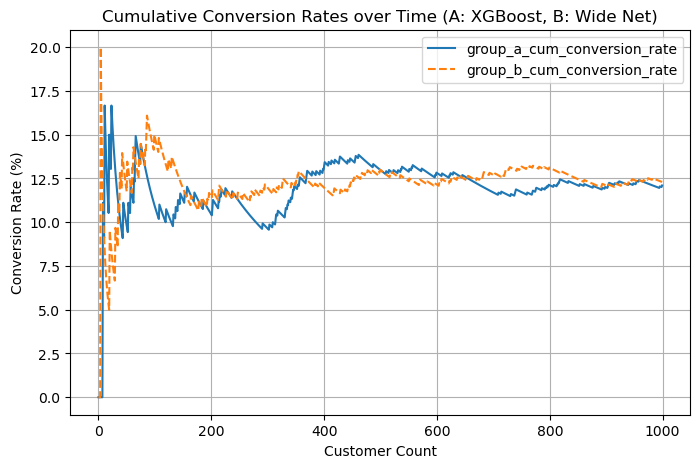

In [113]:
ax = (
    ab_results_df[[
        "group_a_cum_conversion_rate", "group_b_cum_conversion_rate"
    ]]*100
).plot(
    style=["-", "--"],
    figsize=(8, 5),
    grid=True
)

ax.set_ylabel("Conversion Rate (%)")
ax.set_xlabel("Customer Count")
ax.set_title("Cumulative Conversion Rates over Time (A: XGBoost, B: Wide Net)")
plt.show()

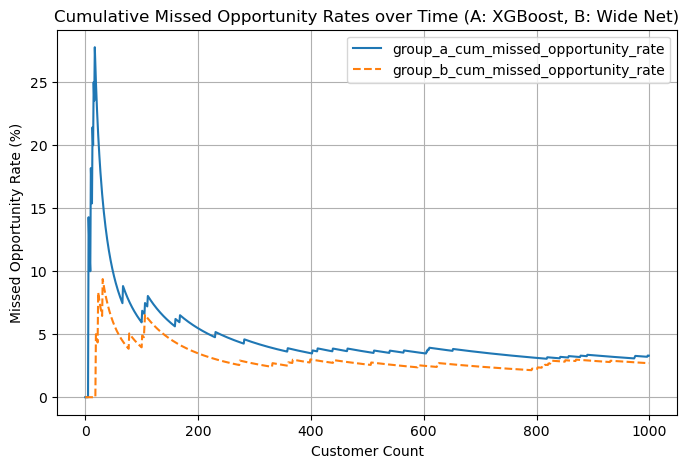

In [114]:
ax = (
    ab_results_df[[
        "group_a_cum_missed_opportunity_rate", "group_b_cum_missed_opportunity_rate"
    ]]*100
).plot(
    style=['-','--'],
    figsize=(8, 5),
    grid=True
)

ax.set_ylabel("Missed Opportunity Rate (%)")
ax.set_xlabel("Customer Count")
ax.set_title("Cumulative Missed Opportunity Rates over Time (A: XGBoost, B: Wide Net)")
plt.show()

## 5.3. Significance Test

### 5.3.1. Testing Cumulative Distribution --> Wide Net Wins

In [87]:
from scipy.stats import ttest_ind

In [88]:
# Performing the t-test
t, p = ttest_ind(a_cum_conv_rates, b_cum_conv_rates)
print(f"Conversion Rate Difference Significance -- t: {t:.3f} & p: {p:.3f}")
t, p = ttest_ind(a_missed_opp_rates, b_missed_opp_rates)
print(f"Missed Opportunity Rate Difference Significance -- t: {t:.3f} & p: {p:.3f}")

Conversion Rate Difference Significance -- t: -5.056 & p: 0.000
Missed Opportunity Rate Difference Significance -- t: 15.963 & p: 0.000


### 5.3.2. Testing Mean

In [89]:
from scipy.stats import t as tstat

#### Conversion Rate Test --> Wide Net Wins

Wide Net has significantly higher conversion rate

In [90]:
a_conv_rate = a_cum_conv_rates[-1]
b_conv_rate = b_cum_conv_rates[-1]

a_conv_rate, b_conv_rate

(0.121, 0.123)

In [91]:
sample_size = 1000

a_mean = a_conv_rate * sample_size
b_mean = b_conv_rate * sample_size

a_std = np.sqrt(sample_size*a_conv_rate*(1-a_conv_rate))
b_std = np.sqrt(sample_size*b_conv_rate*(1-b_conv_rate))

a_mean, a_std, b_mean, b_std

(121.0, 10.313049985334116, 123.0, 10.386096475577338)

In [92]:
t_score = (a_mean - b_mean)/np.sqrt( (a_std**2)/sample_size + (b_std**2)/sample_size )
t_score

-4.321055572680689

In [93]:
pvalue = tstat.sf(np.abs(t_score), sample_size-1) * 2
print(f"p-value: {pvalue:.03f}")

p-value: 0.000


#### Missed Opportunity Rate Test --> Wide Net Wins

Wide Net has significantly lower missed opportunity rate

In [94]:
a_missed_opp_rate = a_missed_opp_rates[-1]
b_missed_opp_rate = b_missed_opp_rates[-1]

a_missed_opp_rate, b_missed_opp_rate

(0.033, 0.027)

In [95]:
sample_size = 1000

a_mean = a_missed_opp_rate * sample_size
b_mean = b_missed_opp_rate * sample_size

a_std = np.sqrt(sample_size*a_conv_rate*(1-a_conv_rate))
b_std = np.sqrt(sample_size*b_conv_rate*(1-b_conv_rate))

a_mean, a_std, b_mean, b_std

(33.0, 10.313049985334116, 27.0, 10.386096475577338)

In [96]:
t_score = (a_mean - b_mean)/np.sqrt( (a_std**2)/sample_size + (b_std**2)/sample_size )
t_score

12.963166718042068

In [97]:
pvalue = tstat.sf(np.abs(t_score), sample_size-1) * 2
print(f"p-value: {pvalue:.03f}")

p-value: 0.000
